<a href="https://colab.research.google.com/github/taerd/ML_lessons/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class K_Means():
    #конструктор
    def __init__(self, dataset, n_clusters = 3,metric=1): #3 кластера по умолчанию, метрика = 1
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.metric = metric
        #массив координат центров кластеров
        # вложенный список
        # в качестве центра рандомные элементы из dataset
        self.centroids = np.array([self.dataset[np.random.randint(0,len(dataset))] for k in range(self.n_clusters)],dtype = 'f')
        # индекс кластера к которому соотносится точка ,integer
        self.labels = np.array([],dtype = 'i')
        self.fitted = False
        # количетсво итераций для центров кластеров
        self.max_n_iter = 100
        # эпсилон смещения чтобы алгоритм останавливался
        min=dataset[:,0].max()-dataset[:,0].min()
        for param in range (1,dataset.shape[1]):
            if min > (dataset[:,param].max()-dataset[:,param].min()):
                min = dataset[:,param].max()-dataset[:,param].min()
        self.tolerance = min/10000
    
    
    def get_dist(self,list1,list2):
        # zip передают два массива и он извлекает пары элементов из обоих массивов
        if (self.metric == 1):
            return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
        elif (self.metric == 2):
            return sum((i-j)**2 for i,j in zip(list1,list2))
        elif (self.metric == 3):
            return sum(np.abs(i-j) for i,j in zip(list1,list2))
        else:
            return max(np.abs(i-j) for i,j in zip(list1,list2))

    
    def get_euclidean_dist(self,list1,list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def get_square_euclidean_dist(self,list1,list2):
        return sum((i-j)**2 for i,j in zip(list1,list2))
    
    def get_manhattan_dist(self,list1,list2):
        return sum(np.abs(i-j) for i,j in zip(list1,list2))
    
    def get_chebyshev_dist(self,list1,list2):
        return max(np.abs(i-j) for i,j in zip(list1,list2))
    
    def get_power_law_dist(self,list1,list2,p,r):
        return sum((np.abs(i-j))**p for i,j in zip(list1,list2))**1./r
        
    
    # распределение данных по кластеру
    def  distribute_data(self): 
        self.labels=np.array([],dtype='i')
        for data in self.dataset:
            # перебор координатов центров
            # вывод индекса кластера для которого меньшее растояние
            #print(np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
            self.labels = np.append(self.labels,\
                                  np.array([self.get_dist(data,center) \
                                            for center in self.centroids]).argmin() )
        
    def  recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            # нумерация меток лейблс
            for k, label in enumerate(self.labels):
                if label == i:
                    temp+= self.dataset[k]
                    num+=1
            self.centroids[i] = temp/num
            
        
    def fit(self):
        iter = 0
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if np.array([self.get_dist(i,j) for i,j in zip(prev_centroids,self.centroids)]).max()\
            < self.tolerance:
                print(iter)
                break
            iter += 1
        self.fitted = True
        
    def get_labels(self):
        return self.labels
    
    def get_centers(self):
        return self.centroids
        
    def predict(self, list2d):
        if self.fitted == True:
            labels=np.array([],dtype='i')
            for data in list2d:
                labels = np.append(labels,\
                                  np.array([self.get_dist(data,center) \
                                            for center in self.centroids]).argmin() )
            return labels
                

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

kmeans = K_Means(dataset = X, n_clusters=2,metric = 1)

kmeans.fit()
print(kmeans.get_labels())
print(kmeans.get_centers())

1
[0 0 0 1 1 1]
[[ 1.  2.]
 [10.  2.]]


In [ ]:
X1 = [1,0]
X2 = [0,2]
X3 = [[0,0],[12,3]]

In [ ]:
len(X3)

2

2.23606797749979
5
3
2
1.25
------
2.23606797749979
[0 1]


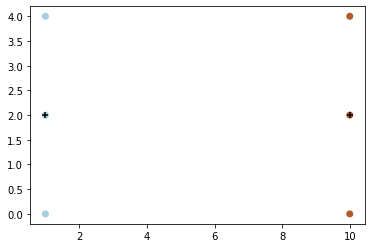

In [ ]:
print(kmeans.get_euclidean_dist(X1,X2))
print(kmeans.get_square_euclidean_dist(X1,X2))
print(kmeans.get_manhattan_dist(X1,X2))
print(kmeans.get_chebyshev_dist(X1,X2))
print(kmeans.get_power_law_dist(X1,X2,2,4))
print("------")
print(kmeans.get_dist(X1,X2))
print(kmeans.predict(X3))

plt.scatter(X[:,0],X[:,1],c=kmeans.labels,cmap=plt.cm.Paired)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c='black',marker='+')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
X = load_iris().data

In [ ]:
kmeans = K_Means(dataset = X[0:130,:], n_clusters=3,metric = 1)

kmeans.fit()
print(kmeans.get_labels())
print(kmeans.get_centers())

12
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1]
[[5.006     3.428     1.462     0.246    ]
 [6.9041667 3.0541666 5.7708335 1.9958333]
 [5.867857  2.7357142 4.332143  1.4035715]]


In [ ]:
print(kmeans.predict(X[130:150,:]))

[1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(X[0:130,:])
kmeans.predict(X[130:150,:])

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])